In [3]:
import os
from md_diffusion import *
import matplotlib.colorbar as cbar
import matplotlib.pyplot as plt
import numpy as np
import yaml

### Read log files

In [23]:
data_dir = '/home/kutay/Documents/git/Nanocar/diffusion/docs/data'
thermo_avg = {}

In [7]:
ALL_DATA = {}
for sim_type in ['flexible', 'rigid']:
    DATA = {}
    simdir = '%s/%s' % (data_dir, sim_type)
    for molecule in os.listdir(simdir):
        mol_simdir = os.path.join(simdir, molecule)
        DATA[molecule.split('_')[0]] = read_lammps_out(mol_simdir, var=['temp', 'emol', 'epair'], t_skip=0, dt_step=1, dt_frame=1000, log='log.%s' % molecule)
    ALL_DATA[sim_type] = DATA

### Read molecule diffusion info

In [63]:
with open('diff_data.yaml', 'r') as f:
    diff_data = yaml.load(f)

#### Sort molecules according to molecular weight

In [64]:
molecules = list(diff_data['mw'].keys())
mol_order = np.argsort([diff_data['mw'][i] for i in molecules])
molecules = [molecules[i] for i in mol_order]
mw = [diff_data['mw'][i] for i in molecules]
D = {}
for stype in ['flexible', 'rigid', 'dctst']:
    D[stype] = [diff_data[stype][i] for i in molecules]
colors = dict(rigid='#CF5955', y='#EAC658', g='#66AD9B', flexible='#4e7fad')
shades = dict(rigid='#672C2A', y='#75632C', g='#33564D', flexible='#3B4C5C')

### Plot energy vs time for each molecule

### Pairwise Energy

No handles with labels found to put in legend.


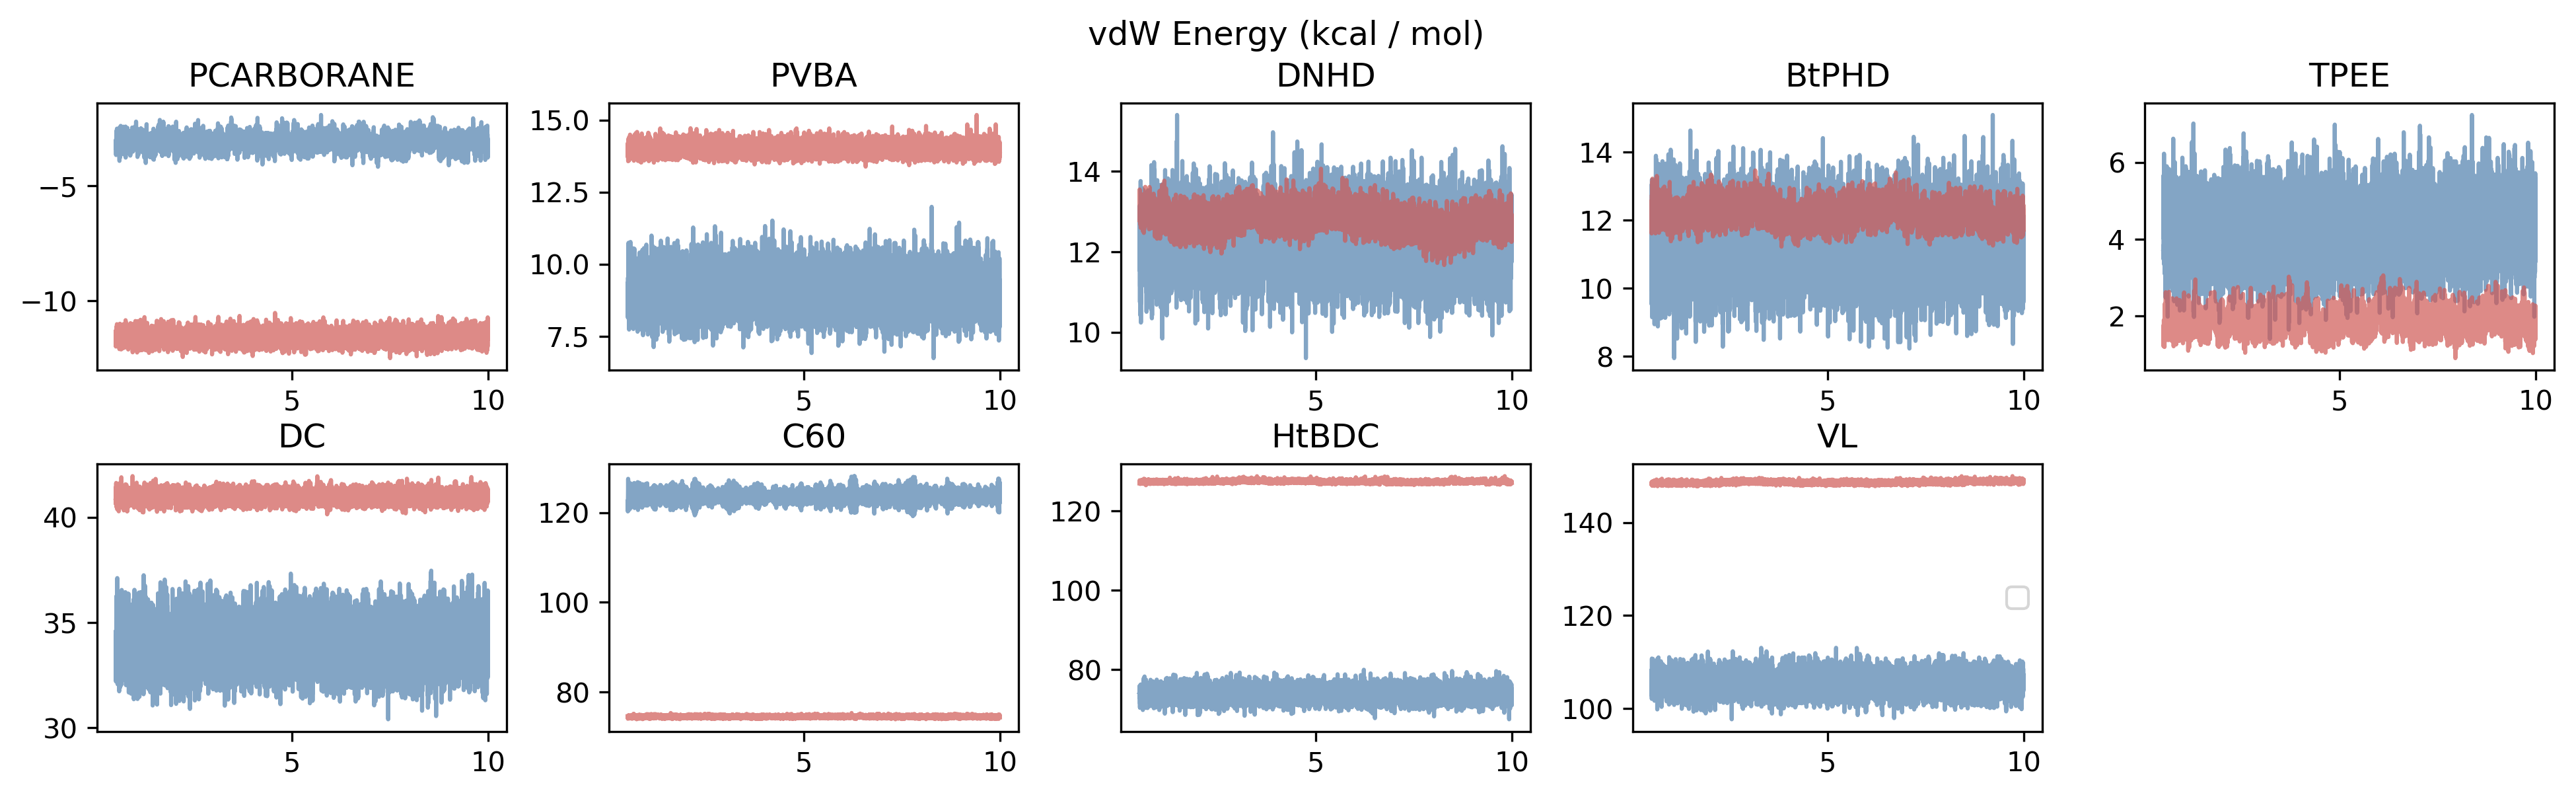

In [29]:
yvar = 'epair'
t_skip = 500

runs = sorted(list(ALL_DATA[sim_type]['DC'].keys()))
thermo_avg[yvar] = {}
fig = plt.figure(figsize=(16, 4.2), dpi=300)
fig.subplots_adjust(wspace=0.25, hspace=0.35)
for midx, mol in enumerate(molecules, start=1):
    ax = fig.add_subplot(2, 5, midx)
    thermo_avg[yvar][mol] = {}
    for sim_type in ['flexible', 'rigid']:
        runs = sorted(list(ALL_DATA[sim_type][mol].keys()))
        yavg = np.average([ALL_DATA[sim_type][mol][run][yvar] for run in runs], axis=0)[t_skip:]
        time = ALL_DATA[sim_type][mol][runs[0]]['time'][t_skip:]
        ax.plot(time, yavg, alpha=0.7, c=colors[sim_type])
        thermo_avg[yvar][mol][sim_type] = np.average(yavg)
    ax.set_title(mol)
plt.suptitle('vdW Energy (kcal / mol)')

### Molecular Energy

Text(0.5,0.98,'Molecular Energy (kcal / mol)')

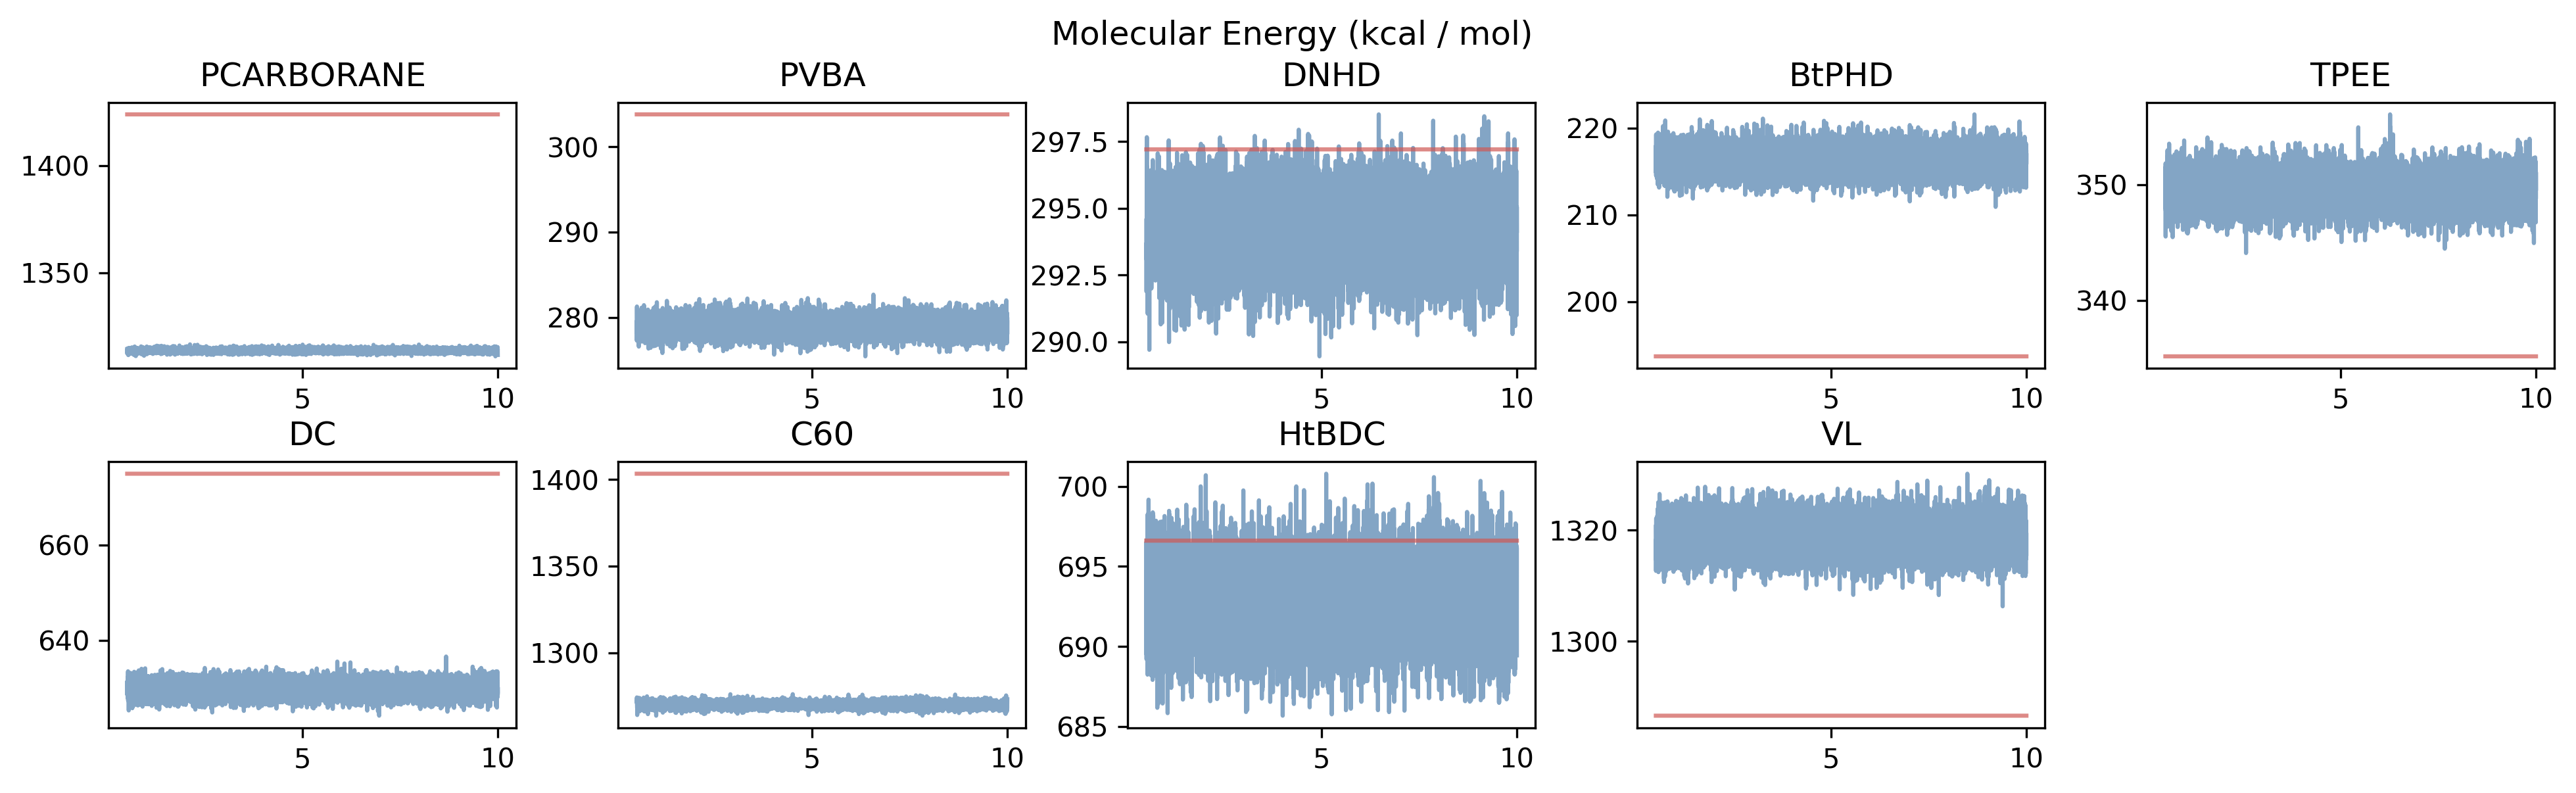

In [40]:
yvar = 'emol'
t_skip = 500

runs = sorted(list(ALL_DATA[sim_type]['DC'].keys()))
thermo_avg[yvar] = {}
fig = plt.figure(figsize=(16, 4.2), dpi=300)
fig.subplots_adjust(wspace=0.25, hspace=0.35)
for midx, mol in enumerate(molecules, start=1):
    ax = fig.add_subplot(2, 5, midx)
    thermo_avg[yvar][mol] = {}
    for sim_type in ['flexible', 'rigid']:
        runs = sorted(list(ALL_DATA[sim_type][mol].keys()))
        yavg = np.average([ALL_DATA[sim_type][mol][run][yvar] for run in runs], axis=0)[t_skip:]
        time = ALL_DATA[sim_type][mol][runs[0]]['time'][t_skip:]
        ax.plot(time, yavg, alpha=0.7, c=colors[sim_type])
        thermo_avg[yvar][mol][sim_type] = np.average(yavg)
    ax.set_title(mol)
plt.suptitle('Molecular Energy (kcal / mol)')

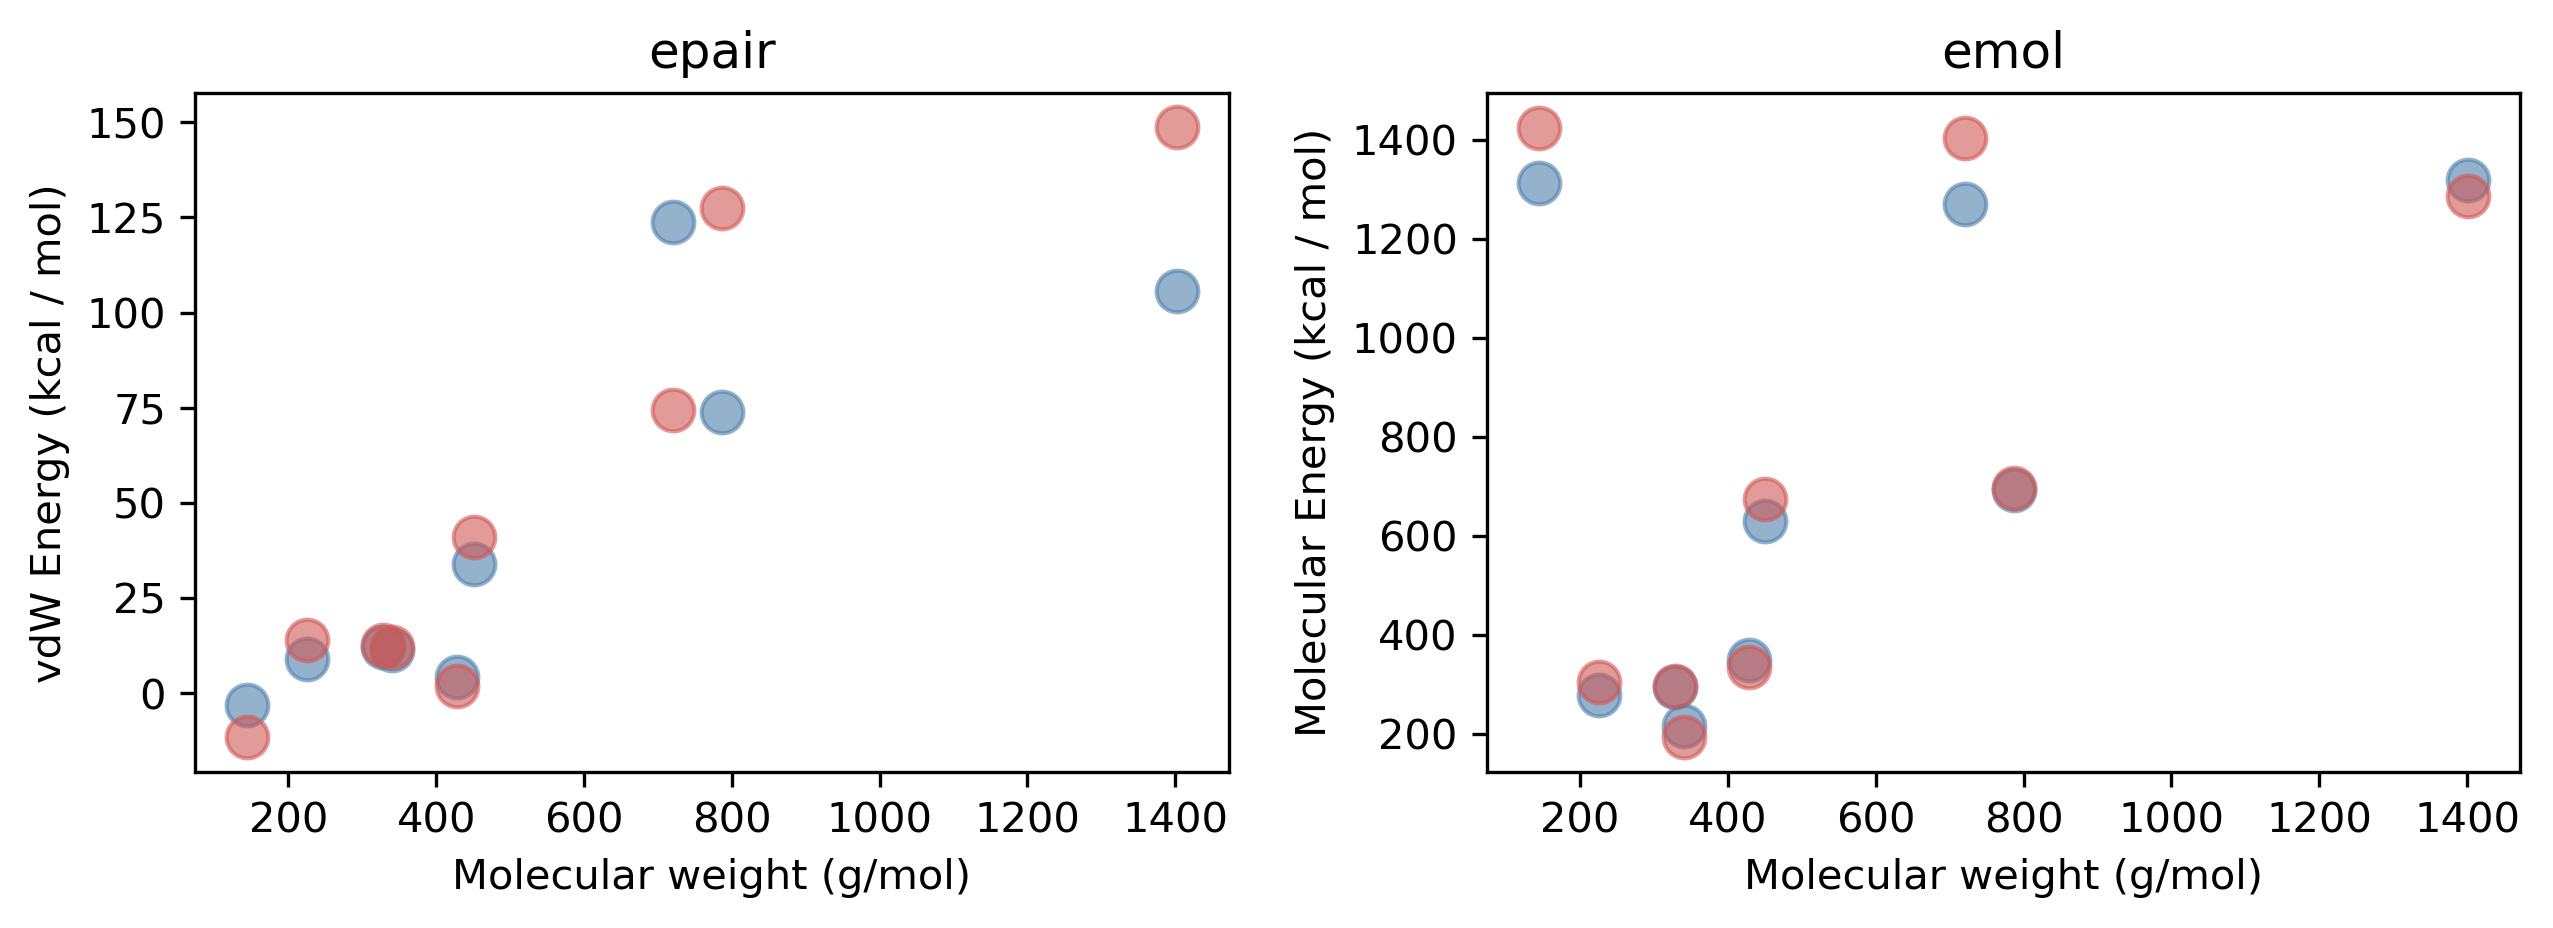

In [50]:
fig = plt.figure(figsize=(10, 3), dpi=300)
fig.subplots_adjust(wspace=0.25, hspace=0.35)
ylabels = ['vdW Energy (kcal / mol)', 'Molecular Energy (kcal / mol)']

for idx, eng in enumerate(['epair', 'emol'], start=1):
    ax = fig.add_subplot(1, 2, idx)
    for sim_type in ['flexible', 'rigid']:
        energy = [thermo_avg[eng][m][sim_type]for m in molecules]
        ax.scatter(mw, energy, c=colors[sim_type], alpha=0.6, s=100)
#         fit_fn = np.poly1d(np.polyfit(mw, energy, 1)) 
#         ax.plot(mw, fit_fn(mw), '--', c=shades[sim_type])
    ax.set_title(eng)
    ax.set_xlabel('Molecular weight (g/mol)')
    ax.set_ylabel(ylabels[idx - 1])

### Energy vs diffusion

Text(0.5,0.98,'Energy vs dcTST diffusion coefficient')

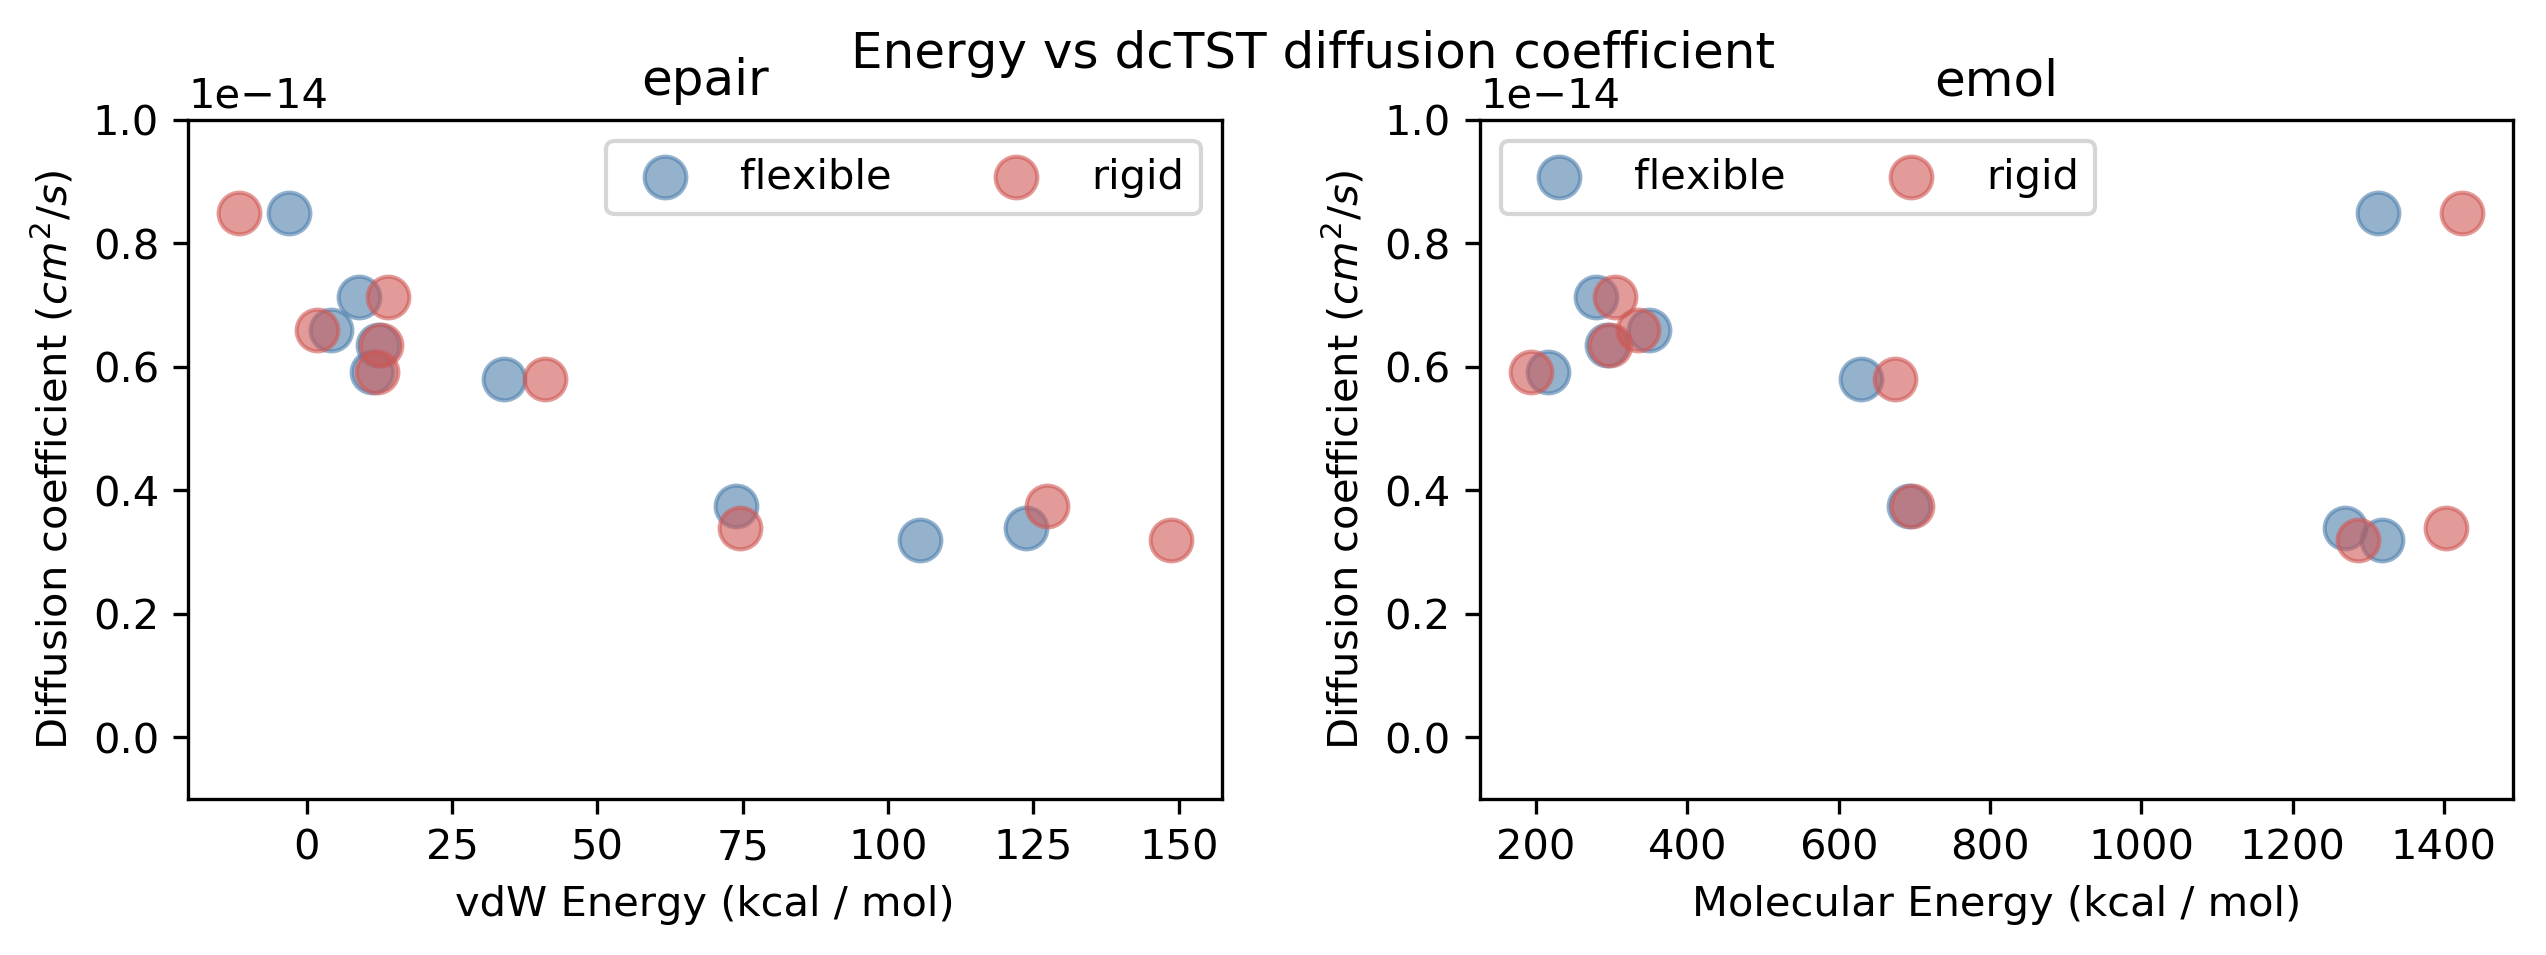

In [71]:
fig = plt.figure(figsize=(10, 3), dpi=300)
fig.subplots_adjust(wspace=0.25, hspace=0.35)
xlabels = ['vdW Energy (kcal / mol)', 'Molecular Energy (kcal / mol)']

for idx, eng in enumerate(['epair', 'emol'], start=1):
    ax = fig.add_subplot(1, 2, idx)
    for sim_type in ['flexible', 'rigid']:
        energy = [thermo_avg[eng][m][sim_type]for m in molecules]
        ax.scatter(energy, D['dctst'], c=colors[sim_type], alpha=0.6, s=100)
#         fit_fn = np.poly1d(np.polyfit(mw, energy, 1)) 
#         ax.plot(mw, fit_fn(mw), '--', c=shades[sim_type])
    ax.set_ylim(-1e-15, 1e-14)
    ax.set_title(eng)
    ax.set_xlabel(xlabels[idx - 1])
    ax.set_ylabel('Diffusion coefficient $(cm^2/s)$')
    ax.legend(['flexible', 'rigid'], ncol=2)
plt.suptitle('Energy vs dcTST diffusion coefficient')

Text(0.5,0.98,'Energy vs dcTST diffusion coefficient')

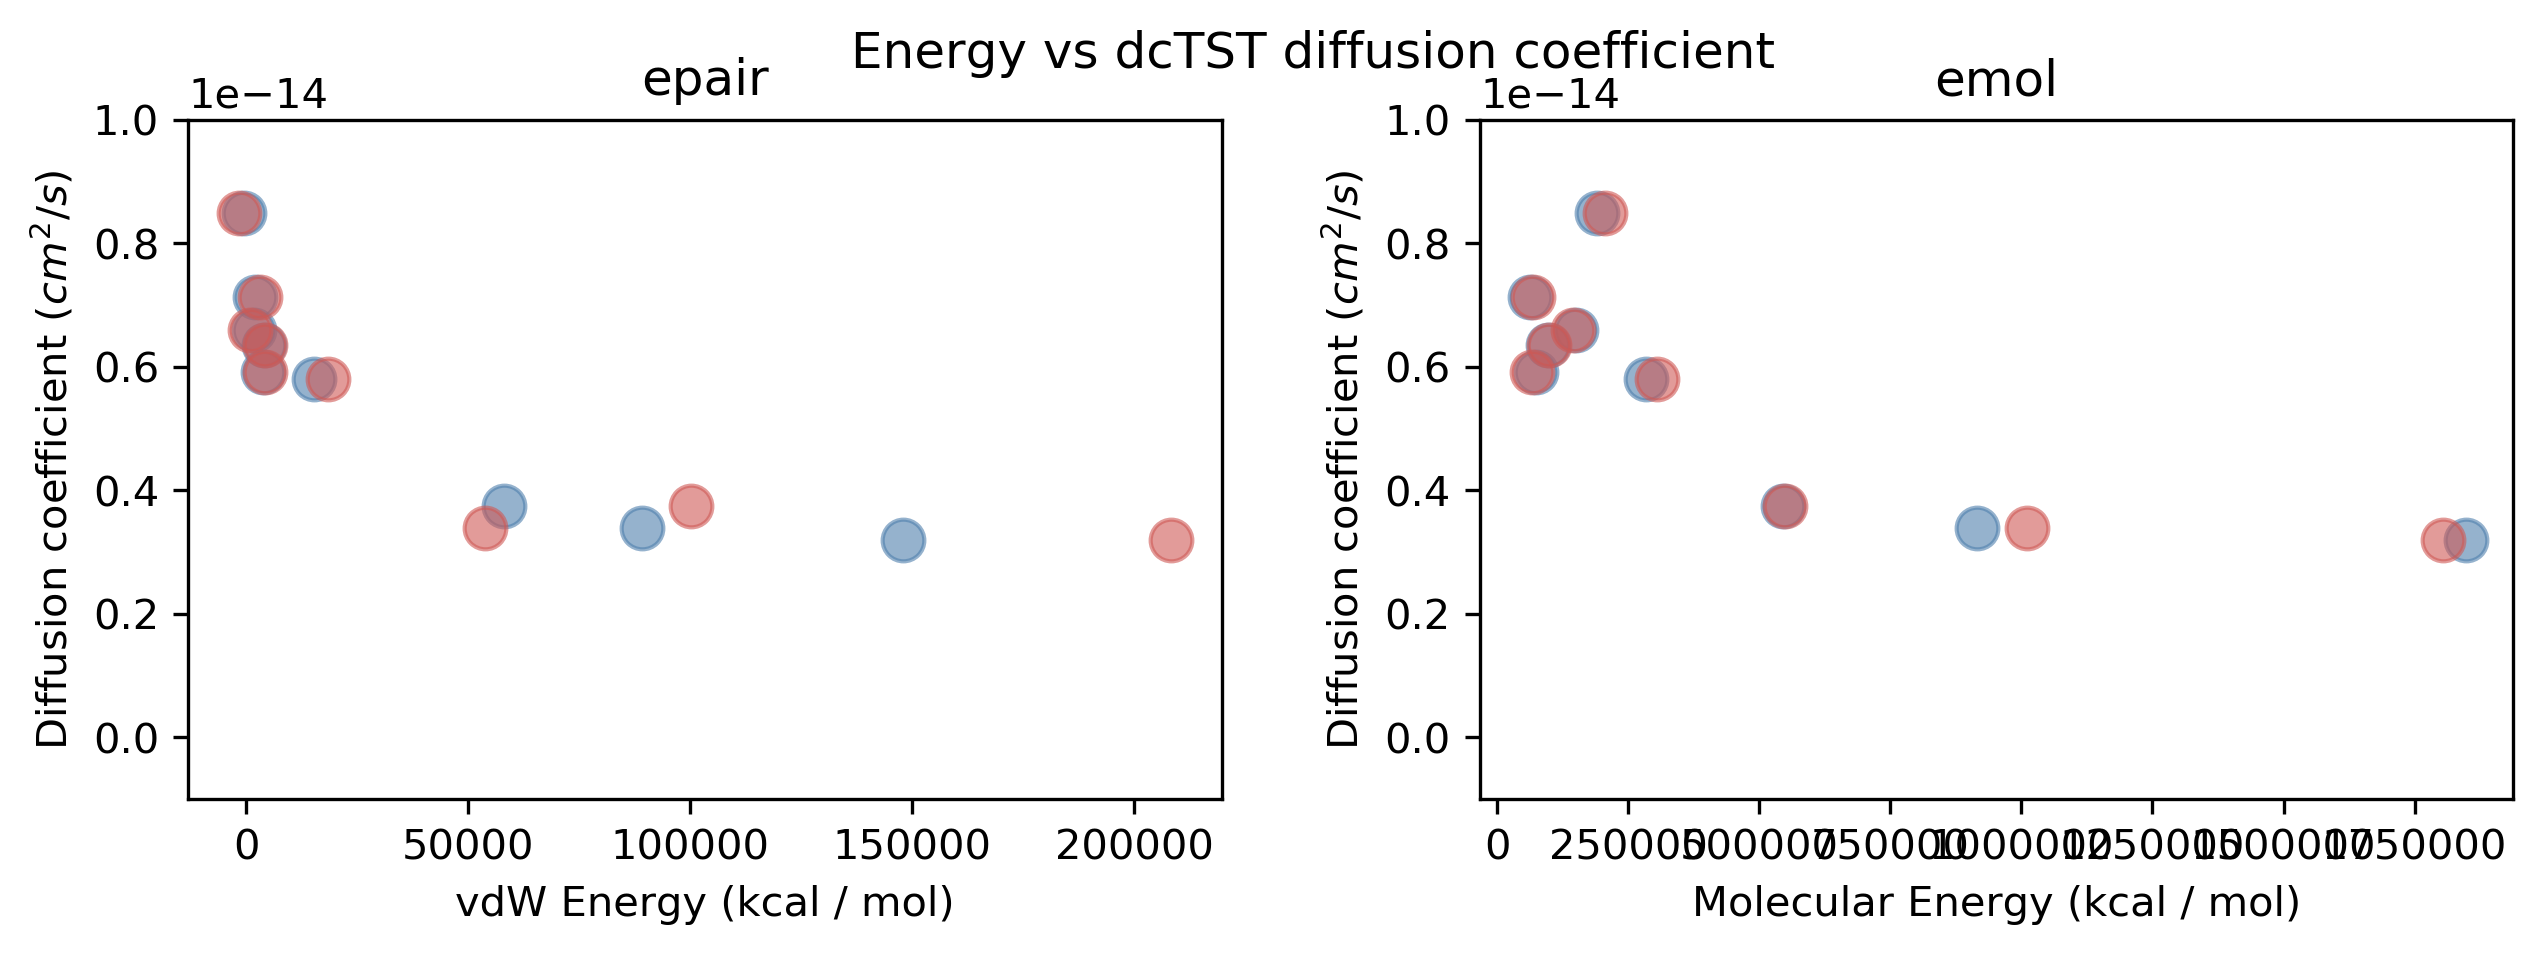

In [72]:
fig = plt.figure(figsize=(10, 3), dpi=300)
fig.subplots_adjust(wspace=0.25, hspace=0.35)
xlabels = ['vdW Energy (kcal / mol)', 'Molecular Energy (kcal / mol)']

for idx, eng in enumerate(['epair', 'emol'], start=1):
    ax = fig.add_subplot(1, 2, idx)
    for sim_type in ['flexible', 'rigid']:
        energy = [thermo_avg[eng][m][sim_type]for m in molecules]
        kbs = np.array(energy) * np.array(mw)
        ax.scatter(kbs, D['dctst'], c=colors[sim_type], alpha=0.6, s=100)
#         fit_fn = np.poly1d(np.polyfit(mw, energy, 1)) 
#         ax.plot(mw, fit_fn(mw), '--', c=shades[sim_type])
    ax.set_ylim(-1e-15, 1e-14)
    ax.set_title(eng)
    ax.set_xlabel(xlabels[idx - 1])
    ax.set_ylabel('Diffusion coefficient $(cm^2/s)$')
    # ax.legend(['flexible', 'rigid'], ncol=2)
plt.suptitle('Energy vs dcTST diffusion coefficient')